# Life Expectancy Prediction Model

## 1) Import libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error, r2_score

import matplotlib.pyplot as plt

## 2) Load the dataset

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_8e1e1a9744ef4b1db100e610cd31d707 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='nvP3fkI-ip0VVT1FIteAY7Np0hVYijpzlBcWUMkZKrwK',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_8e1e1a9744ef4b1db100e610cd31d707.get_object(Bucket='lifeexpectancyprediction-donotdelete-pr-bu0ko0imi7my6o',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

country_data = pd.read_csv(body, na_values=['NaN)'])
country_data.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## 3) Explore dataset and insert missing values, Visualisation of data

In [3]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [4]:
# Check if we have any NaN values in dataset
country_data.isnull().values.any()

True

In [5]:
country_data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
cols = ['Life expectancy ', 'Adult Mortality', 'Alcohol', ' BMI ', 'Hepatitis B', 'Measles ', 'Polio', 'Total expenditure', 'Diphtheria ', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']

imp = SimpleImputer(missing_values=np.nan, strategy='mean')

imp.fit(country_data[cols])
country_data[cols] = imp.transform(country_data[cols])
country_data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [7]:
# Check if all NaN values of dataset are replaced
country_data.isnull().values.any()

False

In [8]:
pd.set_option('precision', 3)
country_data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000,2.938e+03,2938.000,2938.000,2938.000,2938.000
mean,2007.519,69.225,164.796,30.304,4.603,738.251,80.940,2419.592,38.321,42.036,82.550,5.938,82.324,1.742,7483.158,1.275e+07,4.840,4.870,0.628,11.993
std,4.614,9.508,124.080,117.927,3.916,1987.915,22.587,11467.272,19.928,160.446,23.352,2.400,23.640,5.078,13136.800,5.382e+07,4.395,4.483,0.205,3.264
min,2000.000,36.300,1.000,0.000,0.010,0.000,1.000,0.000,1.000,0.000,3.000,0.370,2.000,0.100,1.681,3.400e+01,0.100,0.100,0.000,0.000
25%,2004.000,63.200,74.000,0.000,1.093,4.685,80.940,0.000,19.400,0.000,78.000,4.370,78.000,0.100,580.487,4.189e+05,1.600,1.600,0.504,10.300
50%,2008.000,72.000,144.000,3.000,4.160,64.913,87.000,17.000,43.000,4.000,93.000,5.938,93.000,0.100,3116.562,3.676e+06,3.400,3.400,0.662,12.100
75%,2012.000,75.600,227.000,22.000,7.390,441.534,96.000,360.250,56.100,28.000,97.000,7.330,97.000,0.800,7483.158,1.275e+07,7.100,7.200,0.772,14.100
max,2015.000,89.000,723.000,1800.000,17.870,19479.912,99.000,212183.000,87.300,2500.000,99.000,17.600,99.000,50.600,119172.742,1.294e+09,27.700,28.600,0.948,20.700


In [9]:
country_data.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000,0.170,-0.079,-0.037,-0.048,0.031,0.089,-0.082,0.108,-0.043,0.094,0.082,0.134,-0.140,0.093,0.015,-0.048,-0.051,0.236,0.203
Life expectancy,0.170,1.000,-0.696,-0.197,0.392,0.382,0.204,-0.158,0.559,-0.223,0.462,0.208,0.475,-0.556,0.430,-0.020,-0.472,-0.467,0.692,0.715
Adult Mortality,-0.079,-0.696,1.000,0.079,-0.190,-0.243,-0.139,0.031,-0.381,0.094,-0.273,-0.111,-0.273,0.524,-0.277,-0.013,0.300,0.305,-0.440,-0.435
infant deaths,-0.037,-0.197,0.079,1.000,-0.114,-0.086,-0.179,0.501,-0.227,0.997,-0.171,-0.127,-0.175,0.025,-0.107,0.549,0.466,0.471,-0.144,-0.192
Alcohol,-0.048,0.392,-0.190,-0.114,1.000,0.340,0.075,-0.051,0.318,-0.111,0.214,0.295,0.215,-0.049,0.319,-0.031,-0.417,-0.406,0.416,0.498
percentage expenditure,0.031,0.382,-0.243,-0.086,0.340,1.000,0.012,-0.057,0.229,-0.088,0.147,0.173,0.144,-0.098,0.888,-0.025,-0.251,-0.253,0.380,0.388
Hepatitis B,0.089,0.204,-0.139,-0.179,0.075,0.012,1.000,-0.090,0.135,-0.184,0.409,0.050,0.500,-0.102,0.062,-0.110,-0.105,-0.108,0.151,0.172
Measles,-0.082,-0.158,0.031,0.501,-0.051,-0.057,-0.090,1.000,-0.176,0.508,-0.136,-0.105,-0.142,0.031,-0.068,0.236,0.225,0.221,-0.116,-0.123
BMI,0.108,0.559,-0.381,-0.227,0.318,0.229,0.135,-0.176,1.000,-0.238,0.282,0.232,0.281,-0.244,0.277,-0.063,-0.532,-0.539,0.480,0.508
under-five deaths,-0.043,-0.223,0.094,0.997,-0.111,-0.088,-0.184,0.508,-0.238,1.000,-0.189,-0.128,-0.196,0.038,-0.111,0.536,0.468,0.472,-0.162,-0.207


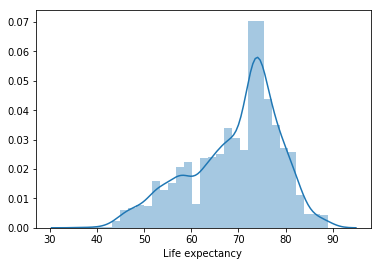

In [10]:
histogram = sns.distplot(country_data.iloc[:, 3], hist=True)
plt.show()

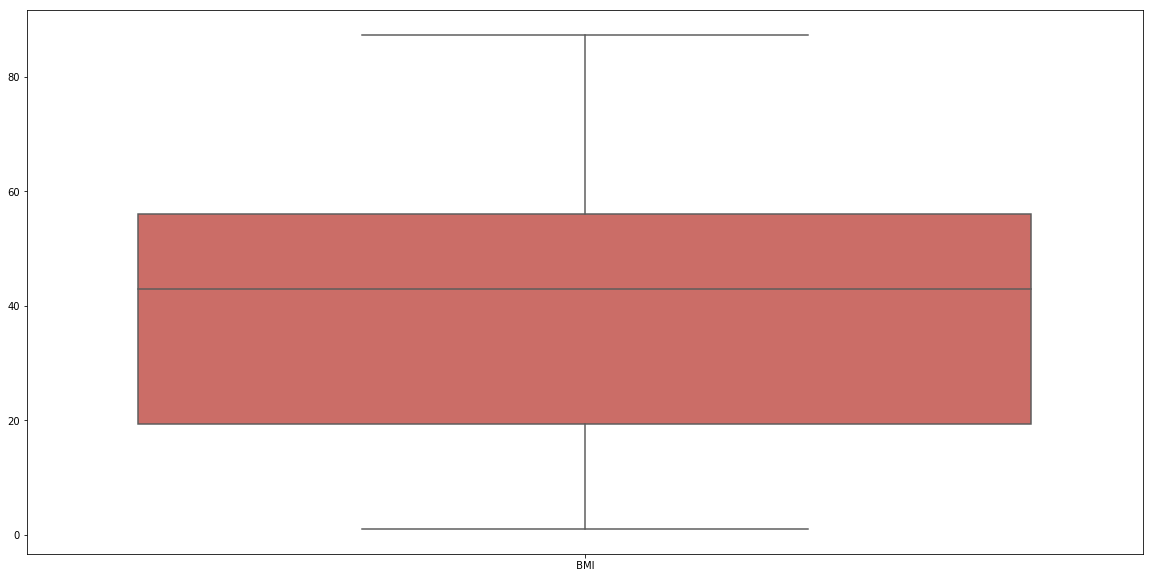

In [11]:
# Set up plot size
fig, ax = plt.subplots(figsize=(20,10))

# Attributes destribution
a = sns.boxplot(orient="v", palette="hls", data=country_data.iloc[:, 10:11], fliersize=14)

In [12]:
#Check for outliers
def find_outliers(df, mn, mx):
    quartile_1, quartile_3 = np.percentile(df, [mn, mx])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)

    outlier_indices = list(df.index[(df < lower_bound)|(df > upper_bound)])
    outlier_values = list(df[outlier_indices])
    
    df[outlier_indices] = np.NaN
    
    return df

In [25]:
print(find_outliers(country_data['Adult Mortality'], 20, 85)

SyntaxError: unexpected EOF while parsing (<ipython-input-25-def2931d83f0>, line 1)

In [26]:
print(find_outliers(country_data['infant deaths'], 20, 85))

0       62.0
1       64.0
2       66.0
3       69.0
4       71.0
5       74.0
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14       NaN
15       NaN
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       1.0
22       1.0
23       1.0
24       1.0
25       1.0
26       1.0
27       1.0
28       1.0
29       1.0
        ... 
2908    29.0
2909    29.0
2910    29.0
2911    30.0
2912    30.0
2913    31.0
2914    32.0
2915    33.0
2916    34.0
2917    36.0
2918    39.0
2919    41.0
2920    43.0
2921    44.0
2922    22.0
2923    23.0
2924    25.0
2925    26.0
2926    28.0
2927    29.0
2928    30.0
2929    30.0
2930    29.0
2931    28.0
2932    28.0
2933    27.0
2934    26.0
2935    25.0
2936    25.0
2937    24.0
Name: infant deaths, Length: 2938, dtype: float64


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [27]:
print(find_outliers(country_data['percentage expenditure'], 20, 85))

0        71.280
1        73.524
2        73.219
3        78.184
4         7.097
5        79.679
6        56.762
7        25.874
8        10.910
9        17.172
10        1.389
11       15.296
12       11.089
13       16.887
14       10.575
15       10.425
16      364.975
17      428.749
18      430.877
19      412.443
20      437.062
21       41.823
22      348.056
23       36.622
24       32.247
25        3.302
26       26.993
27      221.843
28       14.719
29      104.517
         ...   
2908     20.623
2909    196.915
2910    183.046
2911    184.365
2912    143.870
2913    153.678
2914     10.851
2915      1.860
2916    121.879
2917      8.370
2918     65.790
2919     54.043
2920     46.830
2921     45.617
2922      0.000
2923     10.823
2924     10.667
2925     92.602
2926     63.751
2927     53.309
2928      1.040
2929     20.843
2930     29.815
2931     34.262
2932      8.717
2933      0.000
2934      0.000
2935      0.000
2936      0.000
2937      0.000
Name: percentage expendi

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [28]:
print(find_outliers(country_data['under-five deaths '], 20, 85))

0        83.0
1        86.0
2        89.0
3        93.0
4        97.0
5       102.0
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14        NaN
15        NaN
16        0.0
17        1.0
18        1.0
19        1.0
20        1.0
21        1.0
22        1.0
23        1.0
24        1.0
25        1.0
26        1.0
27        1.0
28        1.0
29        1.0
        ...  
2908     42.0
2909     43.0
2910     44.0
2911     45.0
2912     47.0
2913     49.0
2914     51.0
2915     52.0
2916     55.0
2917     59.0
2918     62.0
2919     66.0
2920     70.0
2921     72.0
2922     32.0
2923     34.0
2924     36.0
2925     39.0
2926     42.0
2927     44.0
2928     45.0
2929     46.0
2930     46.0
2931     45.0
2932     43.0
2933     42.0
2934     41.0
2935     40.0
2936     39.0
2937     39.0
Name: under-five deaths , Length: 2938, dtype: float64


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [29]:
print(find_outliers(country_data['Income composition of resources'], 20, 85))

0       0.479
1       0.476
2       0.470
3       0.463
4       0.454
5       0.448
6       0.434
7       0.433
8       0.415
9       0.405
10      0.396
11      0.381
12      0.373
13      0.341
14      0.340
15      0.338
16      0.762
17      0.761
18      0.759
19      0.752
20      0.738
21      0.725
22      0.721
23      0.713
24      0.703
25      0.696
26      0.685
27      0.681
28      0.674
29      0.670
        ...  
2908    0.565
2909    0.554
2910    0.543
2911    0.533
2912    0.518
2913    0.504
2914    0.492
2915    0.479
2916    0.467
2917    0.456
2918    0.443
2919    0.433
2920    0.424
2921    0.418
2922    0.507
2923    0.498
2924    0.488
2925    0.464
2926    0.452
2927    0.436
2928    0.419
2929    0.421
2930    0.414
2931    0.408
2932    0.406
2933    0.407
2934    0.418
2935    0.427
2936    0.427
2937    0.434
Name: Income composition of resources, Length: 2938, dtype: float64


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [30]:
print(find_outliers(country_data['Schooling'], 20, 85))

0       10.1
1       10.0
2        9.9
3        9.8
4        9.5
5        9.2
6        8.9
7        8.7
8        8.4
9        8.1
10       7.9
11       6.8
12       6.5
13       6.2
14       5.9
15       5.5
16      14.2
17      14.2
18      14.2
19      14.2
20      13.3
21      12.5
22      12.2
23      12.0
24      11.6
25      11.4
26      10.8
27      10.9
28      10.7
29      10.7
        ... 
2908    12.5
2909    12.3
2910    12.0
2911    11.8
2912    11.6
2913    11.4
2914    11.1
2915    10.9
2916    10.7
2917    10.5
2918    10.2
2919    10.0
2920     9.8
2921     9.6
2922    10.3
2923    10.3
2924    10.4
2925     9.8
2926    10.1
2927    10.0
2928     9.9
2929     9.7
2930     9.6
2931     9.5
2932     9.3
2933     9.2
2934     9.5
2935    10.0
2936     9.8
2937     9.8
Name: Schooling, Length: 2938, dtype: float64


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [39]:
print(find_outliers(country_data[' BMI '], 22, 40))

0       19.100
1       18.600
2       18.100
3       17.600
4       17.200
5       16.700
6       16.200
7       15.700
8       15.200
9       14.700
10      14.200
11      13.800
12      13.400
13      13.000
14      12.600
15      12.200
16      31.001
17      31.001
18      31.001
19      27.346
20      27.346
21      27.346
22      27.346
23      27.346
24      27.346
25       5.800
26         NaN
27         NaN
28         NaN
29         NaN
         ...  
2908    22.300
2909    21.700
2910    21.200
2911       NaN
2912       NaN
2913    19.700
2914    19.200
2915    18.800
2916    18.400
2917    18.000
2918    17.600
2919    17.300
2920    17.100
2921    16.800
2922    31.800
2923    31.300
2924     3.800
2925     3.300
2926    29.900
2927    29.400
2928    29.000
2929    28.600
2930    28.200
2931    27.900
2932    27.500
2933    27.100
2934    26.700
2935    26.300
2936    25.900
2937    25.500
Name:  BMI , Length: 2938, dtype: float64


/opt/conda/envs/Python36/lib/python3.6/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [40]:
country_data.isnull().values.any()

True

In [41]:
suspected_cols = ['Adult Mortality','infant deaths','percentage expenditure','under-five deaths ','Income composition of resources','Schooling',' BMI ']
imp = SimpleImputer(missing_values=np.nan, strategy="mean")

imp.fit(country_data[suspected_cols])
country_data[suspected_cols] = imp.transform(country_data[suspected_cols])
country_data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000,2938.000,2.938e+03,2938.000,2938.000,2938.000,2938.000
mean,2007.519,69.225,162.485,11.195,4.603,177.626,80.940,2419.592,24.900,15.162,82.550,5.938,82.324,1.742,7483.158,1.275e+07,4.840,4.870,0.628,12.108
std,4.614,9.508,119.123,16.757,3.916,247.734,22.587,11467.272,7.916,23.656,23.352,2.400,23.640,5.078,13136.800,5.382e+07,4.395,4.483,0.205,3.045
min,2000.000,36.300,1.000,0.000,0.010,0.000,1.000,0.000,3.000,0.000,3.000,0.370,2.000,0.100,1.681,3.400e+01,0.100,0.100,0.000,2.800
25%,2004.000,63.200,74.000,0.000,1.093,4.685,80.940,0.000,21.500,0.000,78.000,4.370,78.000,0.100,580.487,4.189e+05,1.600,1.600,0.504,10.400
50%,2008.000,72.000,144.000,3.000,4.160,64.913,87.000,17.000,26.850,4.000,93.000,5.938,93.000,0.100,3116.562,3.676e+06,3.400,3.400,0.662,12.108
75%,2012.000,75.600,225.000,12.748,7.390,237.754,96.000,360.250,31.001,17.999,97.000,7.330,97.000,0.800,7483.158,1.275e+07,7.100,7.200,0.772,14.100
max,2015.000,89.000,648.000,75.000,17.870,1214.558,99.000,212183.000,41.900,105.000,99.000,17.600,99.000,50.600,119172.742,1.294e+09,27.700,28.600,0.948,20.700


## 4) Split Dataset into Training and Test Sets

In [42]:
features = country_data.iloc[:, 4:]
features.head()

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,263.0,62.0,0.01,71.280,65.0,1154.0,19.1,83.0,6.0,8.16,65.0,0.1,584.259,3.374e+07,17.2,17.3,0.479,10.1
1,271.0,64.0,0.01,73.524,62.0,492.0,18.6,86.0,58.0,8.18,62.0,0.1,612.697,3.276e+05,17.5,17.5,0.476,10.0
2,268.0,66.0,0.01,73.219,64.0,430.0,18.1,89.0,62.0,8.13,64.0,0.1,631.745,3.173e+07,17.7,17.7,0.470,9.9
3,272.0,69.0,0.01,78.184,67.0,2787.0,17.6,93.0,67.0,8.52,67.0,0.1,669.959,3.697e+06,17.9,18.0,0.463,9.8
4,275.0,71.0,0.01,7.097,68.0,3013.0,17.2,97.0,68.0,7.87,68.0,0.1,63.537,2.979e+06,18.2,18.2,0.454,9.5


In [43]:
target = country_data.iloc[:, 3]
target.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy , dtype: float64

In [44]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2056, 18) (2056,)
(882, 18) (882,)


## 5) Scaling the data

In [45]:
#scaler = StandardScaler().fit(X_train, y_train)
#X_train_scaled = scaler.transform(X_train)
#X_test_scaled = scaler.transform(X_test)
#pd.DataFrame(X_train_scaled, columns=pd.DataFrame(X_train).columns).head()

## 6) Building the model

In [46]:
from sklearn.linear_model import LinearRegression
model_name = 'Multiple Linear Regression'
mlRegressor = LinearRegression()
model = mlRegressor.fit(X_train,y_train)
y_pred_mlr = model.predict(X_test)
y_pred=pd.DataFrame(y_pred_mlr)
y_test=pd.DataFrame(y_test)
print(mlRegressor)
print(y_pred)
print(y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
          0
0    66.981
1    76.136
2    76.838
3    78.819
4    47.754
5    48.599
6    68.095
7    71.853
8    76.117
9    56.487
10   49.052
11   61.276
12   63.789
13   72.806
14   70.260
15   61.834
16   52.794
17   79.396
18   68.753
19   81.607
20   81.216
21   83.834
22   70.856
23   69.007
24   71.766
25   68.313
26   60.247
27   62.073
28   80.583
29   72.224
..      ...
852  75.208
853  75.226
854  59.047
855  67.712
856  54.176
857  71.894
858  84.075
859  69.388
860  72.937
861  63.372
862  54.818
863  65.761
864  71.399
865  77.121
866  71.437
867  83.052
868  73.567
869  73.376
870  70.554
871  73.356
872  58.930
873  77.163
874  71.795
875  70.356
876  69.270
877  66.688
878  72.966
879  82.643
880  83.368
881  67.413

[882 rows x 1 columns]
      Life expectancy 
2546            73.700
650             75.900
1740            74.200
177             76.800
1377            51.900
535  

In [47]:
def model_metrics(regressor,y_test,y_pred):
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared error: %.2f" % mse)
    r2 = r2_score(y_test, y_pred)
    print('R2 score: %.2f' % r2 )
    return [mse, r2]

In [48]:
mlrMetrics = model_metrics(model,y_test,y_pred)

Mean squared error: 15.66
R2 score: 0.83


## 7) Save the model

In [49]:
wml_credentials = {
    
  "apikey":
  "iam_apikey_description":
  "iam_apikey_name":
  "iam_role_crn":
  "iam_serviceid_crn":
  "instance_id":
  "url":

}

In [50]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient
client = WatsonMachineLearningAPIClient( wml_credentials )

In [51]:
print(wml_credentials['apikey'])

LCwNeMqOOHVXqE8D-rV2gdfMZ0lfxB3H0DZjeuHGbj3v


In [52]:
import requests

url     = "https://iam.bluemix.net/oidc/token"
headers = { "Content-Type" : "application/x-www-form-urlencoded" }
data    = "apikey=" + wml_credentials['apikey'] + "&grant_type=urn:ibm:params:oauth:grant-type:apikey"
IBM_cloud_IAM_uid = "bx"
IBM_cloud_IAM_pwd = "bx"
response  = requests.post( url, headers=headers, data=data, auth=( IBM_cloud_IAM_uid, IBM_cloud_IAM_pwd ) )
iam_token = response.json()["access_token"]

In [53]:
# Save your model

model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Aditya Borude", 
               client.repository.ModelMetaNames.NAME: "Life Expectancy Predictor Model 2"}

In [54]:
# Publish model in Watson Machine Learning repository on Cloud
published_model = client.repository.store_model(model=model, meta_props=model_props, \
                                                training_data=X_train, training_target=y_train)